In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

# **Introduction**

The purpose of my project is to find trends about voter registration within the United States as a nation and within each state located in the US. The goal of the project is to see the trends of voter registration throughout the United States to see where registration is doing well and where it isn't. It is important for someone to read this notebook so they have an understanding on the topic of voter registration and see what trends are happening within the country as a whole and within each state.

Research Questions:
*   How does the new voter registration change in each state year to year?
*   How does the month of the year effect how new voter registrations there are Nationally?



# **Data Processing**

In [5]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


The table contains four variables Jurisdiction, Year, Month, and New registered voters. Jurisdiction contains state names, Year is the year voters registered, Month is the month voters registered, and New registered voters is the number of voters that registered in the following month and year.

In [8]:
voters.isnull().values.any()

False

In [6]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


In [6]:
voters=voters.rename(columns={"Jurisdiction":"NAME"})

In [32]:
voters=voters.rename(columns={"New registered voters":"registered_voters"})

In [28]:
voters.columns

Index(['NAME', 'Year', 'Month', 'registered_voters'], dtype='object')

Potential limitions in the data are that not all states are included within the data and there are only two elections included in the data, having more years and states would limit the data less.

# **Exploratory Data Analysis**

In [31]:
voters.loc[voters.registered_voters==voters.registered_voters.max()]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


In [7]:
voters["registered_voters"].mean()

48223.46226415094

Average number of registered voters is 48223.46226415094

In [36]:
high_voters = voters.loc[voters.registered_voters > voters["registered_voters"].mean()]
high_voters.count()

,0
NAME,36
Year,36
Month,36
registered_voters,36


There were 36 times when voter registration was higher than the above average.

In [38]:
high_voters["NAME"].value_counts()

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


In [42]:
mean_voters = voters.groupby("NAME")["registered_voters"].mean()
mean_voters.sort_values(ascending = False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


Florida, Texas, and California had the highest average voter registration.

# **Data Visualization**

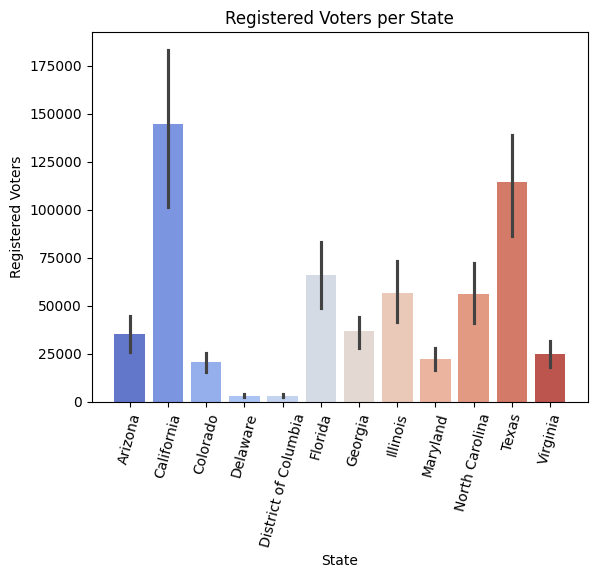

In [75]:
sns.barplot(voters, x = "NAME", y = "registered_voters", hue = "NAME", palette = "coolwarm")
plt.ylabel("Registered Voters")
plt.xlabel("State")
plt.title("Registered Voters per State")
plt.plot(figsize = (10,10))
plt.xticks(rotation = 75)
plt.show()

The states in this plot that have larger populations have higher number of registered voters, compared to the states that have smaller populations.

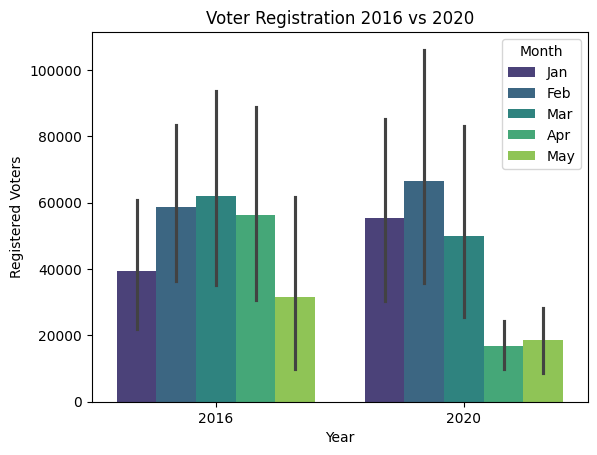

In [51]:
sns.barplot(voters, x = "Year", y = "registered_voters", hue = "Month", palette = "viridis")
plt.ylabel("Registered Voters")
plt.xlabel("Year")
plt.title("Voter Registration 2016 vs 2020")
plt.show()

In this plot there is more varation in the later months of the year while the earlier months being shown only show moderate changes. Overall the months in 2016 appear to have higher voter registration numbers. But the months in 2020 like April and May had decreased registration which could've been related to the covid pandemic.

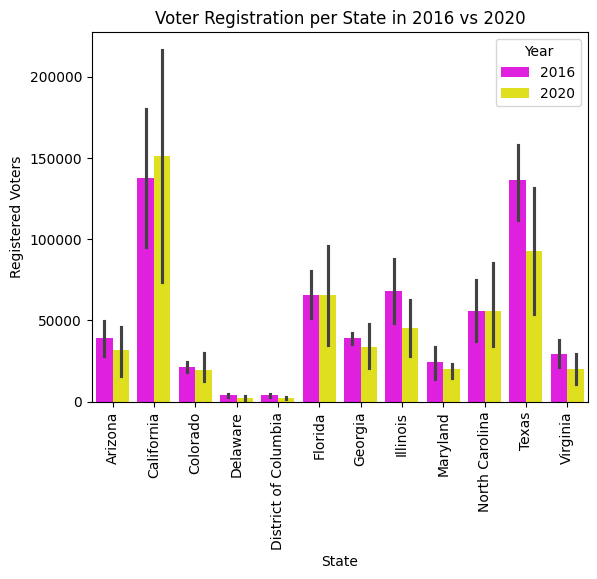

In [74]:
sns.barplot(voters, x = "NAME", y = "registered_voters", hue = "Year", palette = "spring")
plt.ylabel("Registered Voters")
plt.xlabel("State")
plt.title("Voter Registration per State in 2016 vs 2020")
plt.xticks(rotation = 90)
plt.show()

The plot above shows that for most states there isn't a significant change in voter registration when comparing two different years.

# **Mapping**

In [52]:
!git clone https://github.com/SFord87/325-Datasets

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 11.42 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [55]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
states = gpd.read_file(shapefile)

In [56]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358

In [57]:
bbox = states.cx[minx:maxx, miny:maxy]

In [58]:
voter_mean = voters.groupby("NAME")["registered_voters"].mean()

In [59]:
state_vote = bbox.merge(voter_mean, on="NAME", how="inner")

# **Map**

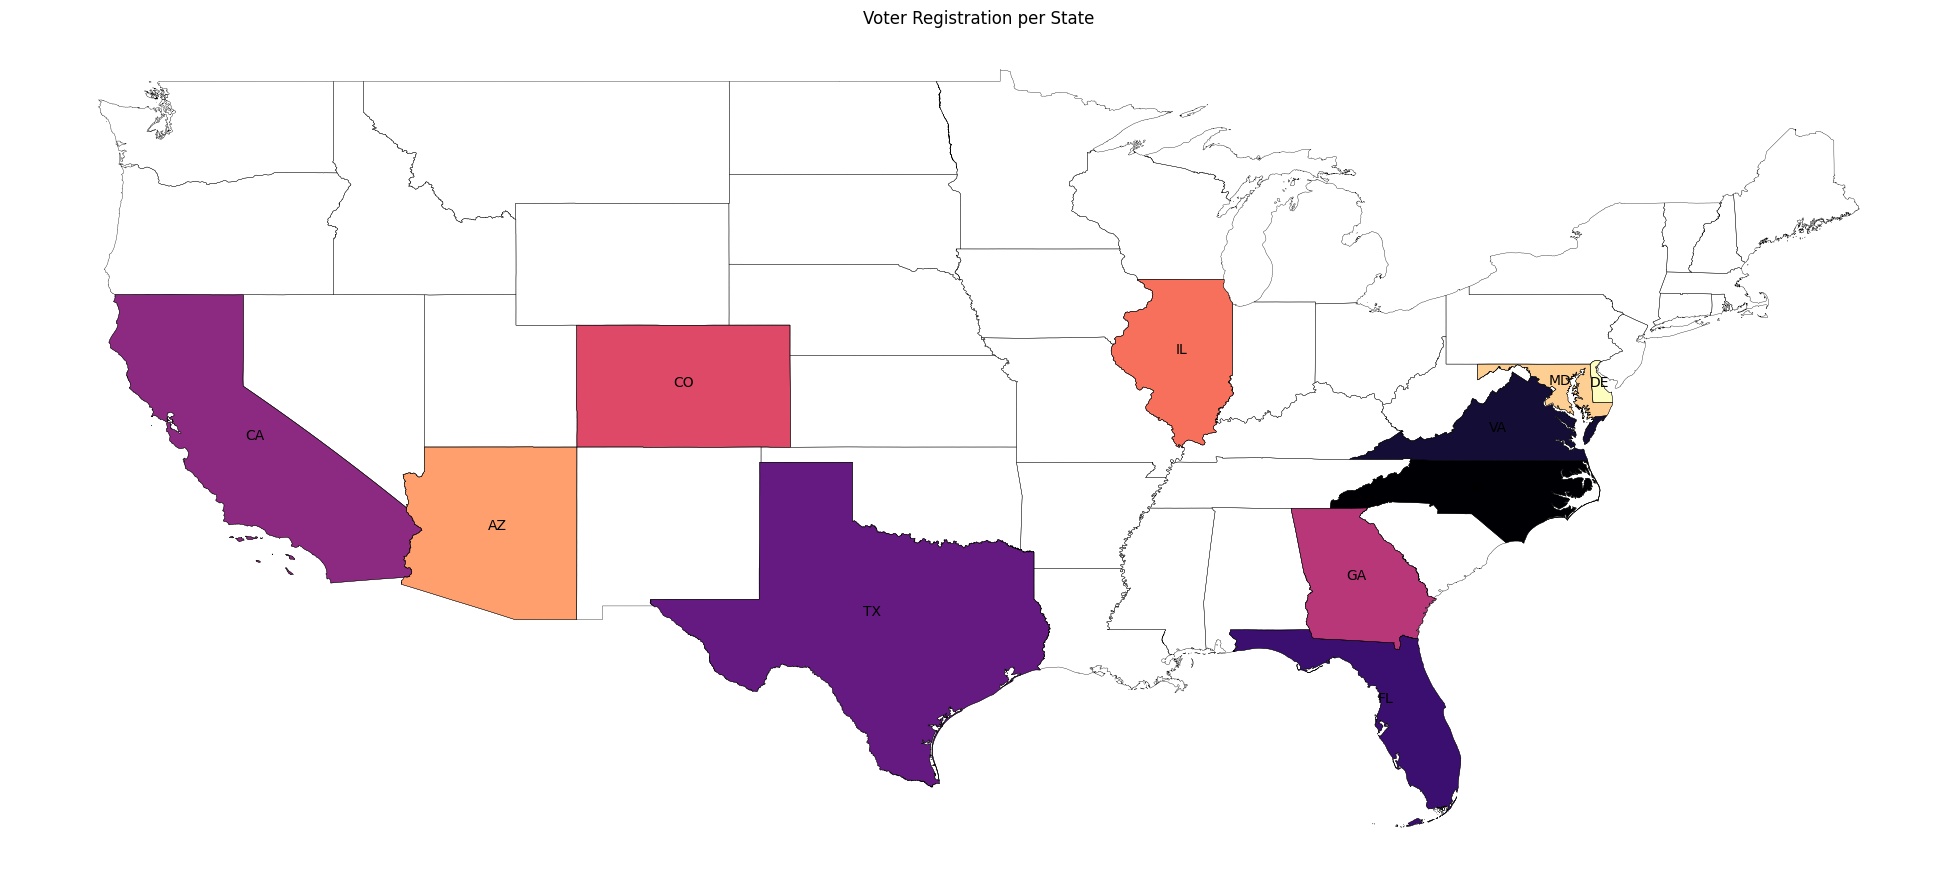

In [68]:
vote_map = state_vote[state_vote["STUSPS"].isin(["AZ","CA", "CO", "DE","FL", "GA", "IL", "MD", "NC", "TX", "VA"])]
fig = plt.figure(1,figsize=(25,15))
ax = fig.add_subplot()
bbox.boundary.plot(ax = ax, edgecolor = "black", linewidth = .25)
vote_map.apply(lambda x: ax.annotate(text=x.STUSPS,
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),ha="center",fontsize=10),axis=1)
vote_map.plot(ax=ax, cmap="magma", edgecolor = "black", linewidth=.25, legend = True)
plt.title("Voter Registration per State")
plt.axis("off")
plt.show()

# **Conclusion**

The insights and outcomes I see from my notebook were that the months which fall closet to election such as January, February, etc., are the months in which most new voters are registering . Also that the states of California and Texas have the most new voters registering. Lastly when comparing the years new voters were registering 2016 barely had more new voters compared to 2020. Some suggestions I would make would make are looking into way some states with similar populations having such a gap between the number of voters registering. If a state has a high a population there should be a equivalent number of voters registering so I would into why some states have low registration numbers. You could look into all of the states within the country to view any kind of discrepancy. If I were to continue working with this project like I said prevoius I would want to look into every state in the country to have a complete set of data. I would also include more years within the project to expand beyond 2016 and 2020 to get a better sense overall of the data, doing the following would improve the results we found.

# **Acadmeic Integrity Statement**

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
  *   the Python notebooks provided by the instructor,
  *   links provided in this notebook,
  *   the assigned readings, and
  *   my own personal notes
2. This means that I did not:
  *   look up anything on Google, or Stack Overflow, Chatgpt, &c.,
  *   discuss the content of the exam with *anyone* other than the instructors or TAs, or
  *   do anything that technically doen't break these rules but is against their spirit.








Jack Stappenbeck